2-1
파일 읽기

In [14]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
df = pd.read_csv("BX-Book-Ratings.csv", sep=";")


In [16]:
df = df.iloc[  0:1149, :]

In [17]:
from surprise import Reader, Dataset, KNNBasic, SVDpp
from surprise.model_selection import cross_validate
import pandas as pd

# Prepare the data to be used in Surprise
reader = Reader(rating_scale=(0,10.0))
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader=reader)


In [18]:
data

In [19]:
algo = SVDpp()

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

# Predict
print(algo.predict(1, 5, r_ui=None, verbose=True))

user: 1          item: 5          r_ui = None   est = 3.32   {'was_impossible': False}
user: 1          item: 5          r_ui = None   est = 3.32   {'was_impossible': False}


In [20]:
from surprise import BaselineOnly
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise import SVD
from surprise import SVDpp

from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


In [21]:
trainset, testset = train_test_split(data, test_size = 0.25)

In [22]:
recom = SVDpp()
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

RMSE: 3.5656


3.5656124841266035

2-2 파일 읽기

In [ ]:
!unzip Behance_appreciate_1M.zip

In [1]:
import pandas as pd
data = pd.read_csv("Behance_appreciate_1M", header=None, sep=" ")
data = data.iloc[ 0:50000, :]

In [2]:
data.columns = ["id", "item", "time"]
data["rating"] = 1

In [3]:
data

id     item        time  rating
0       276633  1588231  1307583271       1
1      1238354  1529213  1307583273       1
2       165550   485000  1307583337       1
3      2173258   776972  1307583340       1
4       165550   158226  1307583406       1
...        ...      ...         ...     ...
49995  2335235   409589  1308482063       1
49996   212970  1645756  1308482089       1
49997  2224276  1529213  1308482094       1
49998  1600416    93980  1308482133       1
49999   805660  1093209  1308482146       1

[50000 rows x 4 columns]

In [4]:
data2 = data.pivot("id", "item", "rating" ).fillna(0)
#transaction encoder

<ipython-input-4-f93572acc061>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data2 = data.pivot("id", "item", "rating" ).fillna(0)


In [5]:
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
freq_itemsets = apriori( data2, min_support= 0.005, use_colnames=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [7]:
freq_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support        itemsets
0   0.007190          (4195)
1   0.006225         (10127)
2   0.019210         (10264)
3   0.010732         (10753)
4   0.009229         (10820)
..       ...             ...
71  0.007512         (21970)
72  0.005903         (21983)
73  0.005581  (18504, 12972)
74  0.005473  (18504, 19223)
75  0.006010  (18504, 19230)

[76 rows x 2 columns]

In [8]:
#freq_itemsets.itemsets
def func2(x):
  return len(x)

freq_itemsets["length"] = freq_itemsets.itemsets.apply( func2 )
df5 = freq_itemsets[ freq_itemsets.length== 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support        itemsets  length
73  0.005581  (18504, 12972)       2
74  0.005473  (18504, 19223)       2
75  0.006010  (18504, 19230)       2

In [10]:
!pip install --upgrade mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from mlxtend.frequent_patterns import fpgrowth
df6 = fpgrowth( data2, min_support= 0.005, use_colnames=False)
rules3 = association_rules(df6, metric="lift", min_threshold=1)
rules3.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents consequents  antecedent support  consequent support   support  \
0     (18504)     (19223)            0.026293            0.025542  0.005473   
1     (19223)     (18504)            0.025542            0.026293  0.005473   
2     (18504)     (12972)            0.026293            0.026508  0.005581   
3     (12972)     (18504)            0.026508            0.026293  0.005581   
4     (18504)     (19230)            0.026293            0.041425  0.006010   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.208163  8.149854  0.004802    1.230630       0.900988  
1    0.214286  8.149854  0.004802    1.239263       0.900294  
2    0.212245  8.006874  0.004884    1.235780       0.898738  
3    0.210526  8.006874  0.004884    1.233362       0.898936  
4    0.228571  5.517691  0.004921    1.242597       0.840874

* Sparse format

In [61]:
import pandas as pd
data = pd.read_csv("Behance_appreciate_1M", header=None, sep=" ")
data.columns = ["id", "item", "time"]
data["rating"] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
df_tmp = data.groupby('id')['item'].apply(set).apply(list).to_list()
print(df_tmp[:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[142521, 329834, 956235, 872302], [1755816, 901978, 379242], [2321920, 931712, 162052, 1522183, 270727, 1026185, 447626, 2006151, 1786766, 2156815, 2388240, 1834513, 64019, 2079254, 1623193, 1766810, 1829401, 1860125, 823582, 917791, 1329439, 2079390, 1790114, 622627, 1682340, 574885, 518181, 256167, 1739428, 1697700, 2243752, 182190, 2251438, 151856, 332083, 1568695, 594232, 1740088, 1466941, 280257, 139970, 491331, 1807049, 1971913, 2247242, 2280270, 521809, 375378, 2309970, 1341781, 43223, 1225433, 2349914, 1725403, 2441177, 771549, 1735781, 1725035, 996845, 1795694, 1730543, 599792, 58998, 1728375, 497912, 1080185, 1251069, 905598, 808575], [358722, 2148359, 2279528, 2237708, 2290360], [1235849, 1234285], [1986835], [1123081, 2325210, 2212828], [1965349, 2293222, 2361224, 1496205, 1857519, 1965297, 2041427, 2391292, 2385882, 980699, 1770684], [2456401], [2239360, 763393, 1670788, 1339525, 1274951, 1740296, 1654792, 1617033, 2418060, 1859853, 1734165, 2091030, 1239963, 190108, 1805

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df_tmp).transform(df_tmp, sparse=True)
print(te_ary)

In [69]:
len(te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


178788

In [70]:
te_ary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<63497x178788 sparse matrix of type '<class 'numpy.bool_'>'
	with 1000000 stored elements in Compressed Sparse Row format>

2-3

In [13]:
!unzip 2008.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  2008.zip
  inflating: 2008.csv                


In [19]:
import pandas as pd
import networkx as nx
df = pd.read_csv("2008.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2389217, 29)

In [17]:
edges = df[ ["Origin", "Dest"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
G = nx.from_pandas_edgelist(edges, source='Origin', target='Dest')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print(G)

Graph with 293 nodes and 2605 edges


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
print('density:', nx.density(G))
print('transitivity:', nx.transitivity(G))
print('reciprocity:', nx.reciprocity(G))

density: 0.060895787554350364
transitivity: 0.38268412767525206
reciprocity: 0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
deg = nx.degree(G)
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-26-c974186d8b37>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


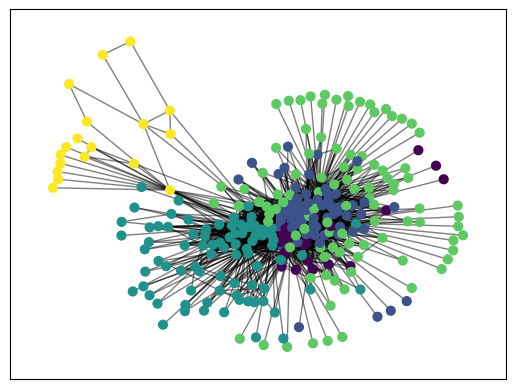

In [26]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

partition = cl.best_partition(G)
pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [27]:
print(G)

Graph with 293 nodes and 2605 edges


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.groupby("Origin")["DepDelay"].mean()
df.groupby("Dest")["ArrDelay"].mean()
deg = nx.degree(G)
deg_cen = nx.degree_centrality(G)
bet_cen = nx.betweenness_centrality(G)
clo_cen = nx.closeness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)

In [40]:
tmp = df.groupby("Origin")["DepDelay"].mean()
tmp2 = df.groupby("Dest")["ArrDelay"].mean()
tmp3 = pd.merge(tmp, tmp2, left_index=True, right_index=True )
tmp3["id"] = tmp3.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
tmp3 = pd.merge( tmp3, pd.DataFrame( deg, columns = ["id", "deg"]), on="id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
tmp4 = pd.merge( tmp3, pd.DataFrame( {'id':bet_cen.keys(), "bet": bet_cen.values() }), on="id")
tmp4 = pd.merge( tmp4, pd.DataFrame( {'id':clo_cen.keys(), "clo": clo_cen.values() }), on="id")
tmp4 = pd.merge( tmp4, pd.DataFrame( {'id':eig_cen.keys(), "eig": eig_cen.values() }), on="id")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
tmp4.index = tmp4.id
tmp4.drop("id", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
tmp4.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DepDelay  ArrDelay       deg       bet       clo       eig
DepDelay  1.000000  0.698518  0.138971  0.071096  0.197176  0.164061
ArrDelay  0.698518  1.000000  0.014011  0.001108  0.095881  0.032331
deg       0.138971  0.014011  1.000000  0.764048  0.867786  0.957892
bet       0.071096  0.001108  0.764048  1.000000  0.556813  0.584850
clo       0.197176  0.095881  0.867786  0.556813  1.000000  0.919837
eig       0.164061  0.032331  0.957892  0.584850  0.919837  1.000000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
